# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [2]:

from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.filters import threshold_mean

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [123]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
def erosion(image,window):
    copy_image = np.copy(image)
    struct_element_sized = window.shape[0]
    num_ones = window[window == 1].shape[0]
    eroded_image = np.pad(copy_image,pad_width=struct_element_sized-2,mode='constant')
    for x in range(eroded_image.shape[0] - (eroded_image.shape[0] - copy_image.shape[0])):
        for y in range(eroded_image.shape[1] - (eroded_image.shape[1] - copy_image.shape[1])):
            eroded = np.logical_and(eroded_image[x:x+struct_element_sized,y:y+struct_element_sized],window) # 2d array of logical and
            if(eroded[eroded == 1].shape[0] == num_ones): # if the number of ones in the anding = the number of ones in the struct. element
                eroded_image[x,y] = 1
            else:
                eroded_image[x,y] = 0
    return eroded_image

def dilation(image,window):
    copy_image = np.copy(image)
    struct_element_sized = window.shape[0]
    dialated_image = np.pad(copy_image,pad_width=struct_element_sized-2,mode='constant')
    for x in range(dialated_image.shape[0] - (dialated_image.shape[0] - copy_image.shape[0])):
        for y in range(dialated_image.shape[1] - (dialated_image.shape[1] - copy_image.shape[1])):
            dial = np.logical_and(dialated_image[x:x+struct_element_sized,y:y+struct_element_sized],window) # 2d array of logical and
            if(dial[dial == 1].shape[0] >= 1): # if there exist any true (hit) in the anding
                dialated_image[x,y] = 1
            else:
                dialated_image[x,y] = 0
    return dialated_image



In [124]:
picture2 = io.imread('./img/coins.jpg')
grayImage = rgb2gray(picture2)
binaryImage = grayImage > 0.75
window = np.ones((3,3))
window = np.array([[0,1,0],[1,1,1],[0,1,0]])

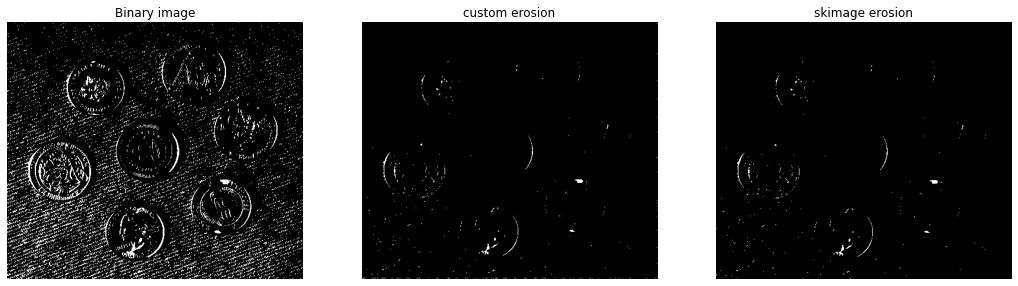

In [125]:

my_erosion = erosion(binaryImage,window)
sk_erosion = binary_erosion(binaryImage,window)
show_images([binaryImage,my_erosion,sk_erosion],['Binary image','custom erosion','skimage erosion'])

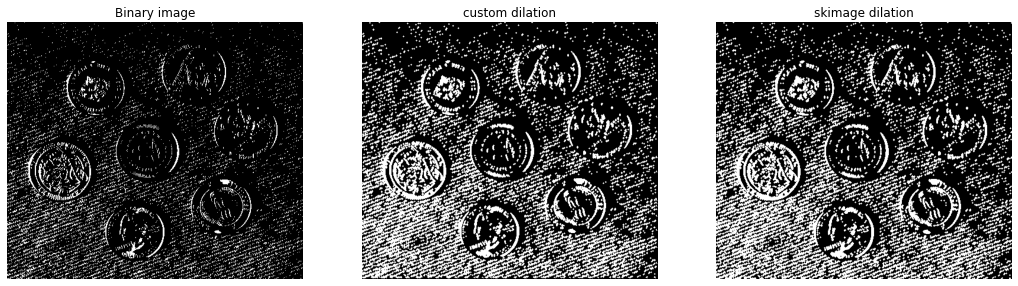

In [126]:
my_dilation = dilation(binaryImage,window)
sk_dilation = binary_dilation(binaryImage,window)
show_images([binaryImage,my_dilation,sk_dilation],['Binary image','custom dilation','skimage dilation'])

In [128]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
picture2 = io.imread('./img/card.jpg')
grayImage = rgb2gray(picture2)

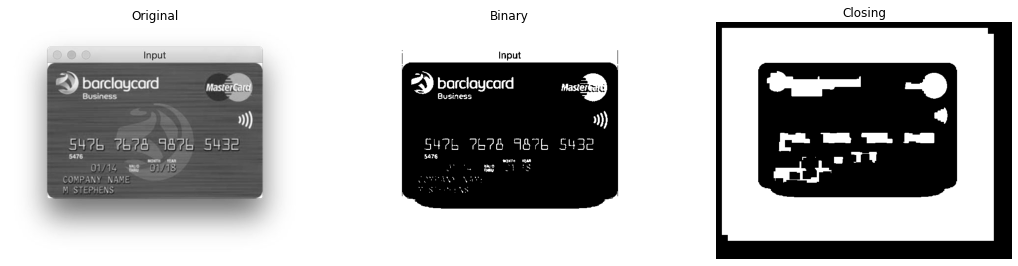

In [130]:
binaryImage = grayImage > 0.65

window = np.ones((15,15))
dialated_img = dilation(binaryImage,window)
closing = erosion(dialated_img,window)
show_images([grayImage,binaryImage,closing],["Original","Binary","Closing"])

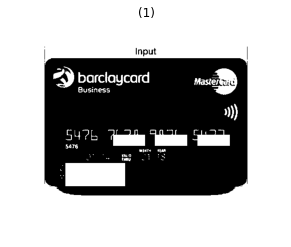

In [131]:
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes\n",
contours = find_contours(closing, 0.8)
img_with_boxes = np.copy(binaryImage)
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in contours:
    Ymax = int(max(box[:,0]))
    Ymin = int(min(box[:,0]))
    Xmax = int(max(box[:,1]))
    Xmin = int(min(box[:,1]))
    aspect_ratio =( Xmax - Xmin )/ ( Ymax - Ymin )
    if(aspect_ratio > 2.5 and aspect_ratio < 3.5):
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=grayImage.shape)
        img_with_boxes[rr, cc] = 1 #set color white

show_images([img_with_boxes])

In [106]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''


'\n3) Skeletonization:\n    - Load "horse.jpg" from the img folder \n    - Use a binary threshold of 0.9 to remove invisible noise in the background\n    - Use Skimage\'s "skeletonize(image)" to acquire the image\'s skeleton & show it\n    - Use Skimage\'s "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it\n'

In [ ]:
horsePic = rgb2gray(io.imread('./img/horse.jpg'))

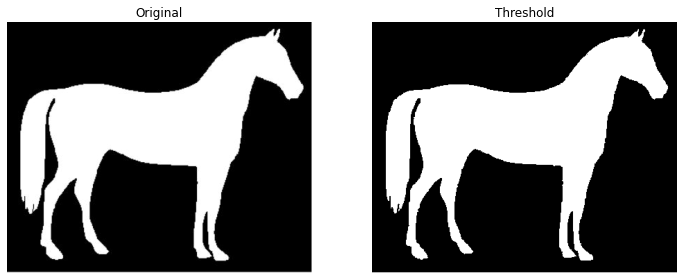

In [ ]:
# print(horsePic)
horsePicThreshold = np.where(horsePic > 0.9, 1, 0)
show_images([horsePic,horsePicThreshold],["Original", "Threshold"])
# print(horsePicThreshold)

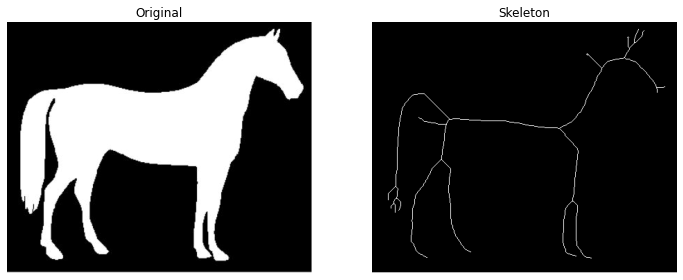

In [ ]:
horseSkeleton = skeletonize(horsePicThreshold)
show_images([horsePic,horseSkeleton],["Original", "Skeleton"])

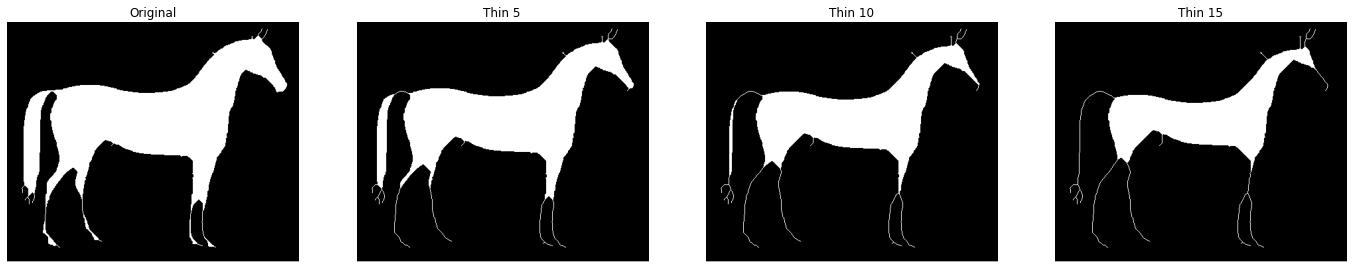

In [ ]:
horsePicThin5 = thin(horsePicThreshold, 5)
horsePicThin10 =thin(horsePicThreshold, 10)
horsePicThin15 =thin(horsePicThreshold, 15)
horsePicThin20 =thin(horsePicThreshold, 20)
show_images([horsePicThin5,horsePicThin10,horsePicThin15,horsePicThin20],["Original", "Thin 5","Thin 10","Thin 15","Thin 20"])